In [144]:
# Show the dataframe shape.
import pandas as pd
df = pd.read_csv('marketing_customer_analysis.csv')
print(df.shape)
df.info()

(10910, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 109

In [145]:
# Standardize header names.
df.columns = list(map(lambda x: x.lower(), df.columns))
df = df.drop(['unnamed: 0'], axis=1)
print(df.columns)
display(df.head())

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [146]:
# Which columns are numerical?
import numpy as np
df_numerical = df.select_dtypes([np.number])
df_numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [147]:
# Which columns are categorical?
df_categorical = df.select_dtypes(['object'])
df_categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [148]:
#Check and deal with NaN values.

# first let's check where they are
round((df.isna().sum()/df.shape[0]),4)*100

customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type                     50.25
dtype: float64

In [149]:
# For numerical columns, we have more than 5% of missing values in the columns : 
# 'months since last claim '
# 'number of open complaints'

# For categorical, same for the columns :
# state
# response  
# vehicle class
# vehicle size
# vehicle type  : here it's more than 50% ! It would not make any sense to replace the 50% missing values with a mode value
# as we already have info on vehicules with vehicle class and vehicle size. I choose to drop this column completely.


In [150]:
# Drop vehicle type column 
df = df.drop(['vehicle type'], axis=1)

In [151]:
df.shape

(10910, 24)

In [152]:
# Then I choose not to drop rows because there are too many missing values in the columns (more than 5%)
# Let's start with numerical columns :
# I'll first check the dispersion to see if I replace NaN by the median ou the mean value

np.std(df['months since last claim'])

#I'll use the median for this column

10.079858341689773

In [153]:
np.std(df['number of open complaints'])

# I'll use the mean for this column

0.9124127872193832

In [154]:
# replace NaN in column months since last claim by the median value
median_months_last_claim = df['months since last claim'].median()
df['months since last claim'] = df['months since last claim'].fillna(median_months_last_claim)
df['months since last claim'].isna().sum()

0

In [155]:
# replace NaN in column number of open complaints by the mean value

mean_number_open_complaints = round(df['number of open complaints'].mean(),2)
df['number of open complaints'] = df['number of open complaints'].fillna(mean_number_open_complaints)
df['number of open complaints'].isna().sum()

0

In [156]:
# For categorical values, I'll first check the distribution of the values. Then I decide what to do.
df['state'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [157]:
na_rows_indexes = df[df['state'].isna()==True].index
number_of_nas = len(na_rows_indexes)

In [79]:
df.iloc[na_rows_indexes, 1] = np.random.choice(df[df['state'].isna() == False], size = number_of_nas)

ValueError: a must be 1-dimensional

In [158]:
# if I choose to replace the NaN by the mode (California), it will change the data distribution a lot
# Moreover all states are well represented in the population.
# So I decide to replace NaN randomly with the value "unknown" not to impact my distribution

df['state'] = df['state'].fillna('Unknown')
df['state'].isna().sum()

0

In [159]:
df['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [160]:
# Here I will replace by the mode :
df['response'] = df['response'].fillna('No')
df['response'].isna().sum()

0

In [161]:
df['vehicle class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [162]:
df['vehicle class'] = df['vehicle class'].fillna('Four-Door Car')
df['vehicle class'].isna().sum()

0

In [163]:
df['vehicle size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle size, dtype: int64

In [164]:
df['vehicle size'] = df['vehicle size'].fillna('Medsize')
df['vehicle size'].isna().sum()

0

In [165]:
# There are no more missing values in the dataframe
df.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [166]:
# Datetime format - Extract the months from the dataset and store in a separate column. 

# First let's convert the value into datetime format in the column effective to date

df['effective to date'] = pd.to_datetime(df['effective to date'], errors='coerce')
df.dtypes

df['effective to date'].unique

<bound method Series.unique of 0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: effective to date, Length: 10910, dtype: datetime64[ns]>

In [167]:
df['month_effective'] = df['effective to date'].dt.month
print(df['month_effective'])
print(df.columns)

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month_effective, Length: 10910, dtype: int64
Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'month_effective'],
      dtype='object')


In [168]:
# Then filter the data to show only the information for the first quarter , ie. January, February and March.

df_q1 = df[(df['month_effective'] == 1) | (df['month_effective'] == 2) | (df['month_effective'] == 3)]
display(df_q1.shape)

(10910, 25)

In [169]:
# it seems that all 'effective to date' data are in the first quarter

# ROUND 3

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

In [171]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [172]:
df_categorical.describe()

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
count,10910,10279,10279,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10910,10288,10288,5428
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3,1
top,ID89933,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,A
freq,7,3552,8813,6660,3272,239,6789,5573,6902,6319,8128,4118,4483,4121,5212,7251,5428


In [173]:
# Show a plot of the total number of responses.
# first import libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

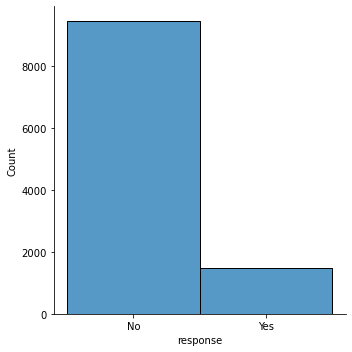

In [174]:
sns.displot(df['response'], bins=20)
plt.show()

In [175]:
# Show a plot of the response rate by the sales channel

df['sales channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

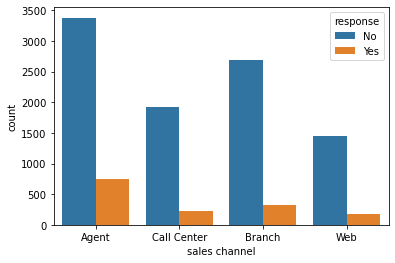

In [176]:
sns.countplot(x="sales channel", hue="response", data=df)
plt.show()
# if we compute the sales conversion (yes / (yes+no)) by sales channel, the Agent channel is working the best
# branch would be the 2nd one

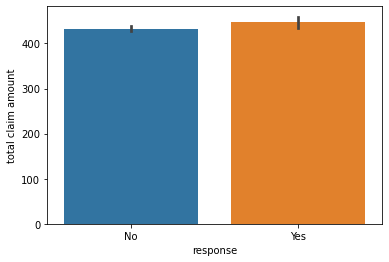

In [177]:
sns.barplot(x = 'response',y='total claim amount', data = df) 
plt.show()
# the total claim amount doesn't seem to have any impact on the response.

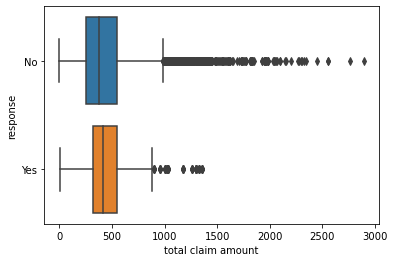

In [178]:
sns.boxplot(x = 'total claim amount',y='response', data=df)
plt.show()
#But the higher the total claim amount, the more "no" we have

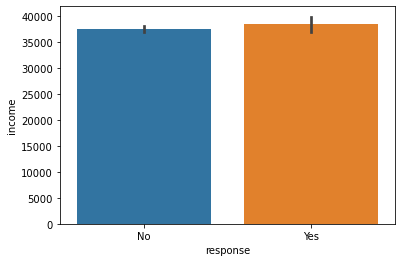

In [179]:
# Show a plot of the response rate by income.
sns.barplot(x = 'response',y='income', data = df) 
plt.show()

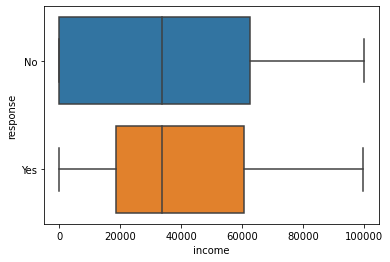

In [180]:
sns.boxplot(x = 'income',y='response', data=df)
plt.show()
# Income seems to have a low impact on the response. But the lower the income, the more "no" we get.

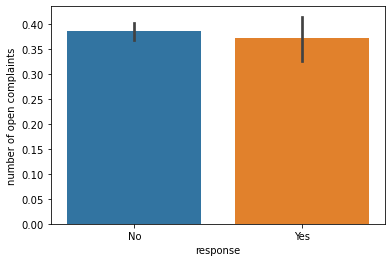

In [181]:
sns.barplot(x = 'response',y='number of open complaints', data = df) 
plt.show()

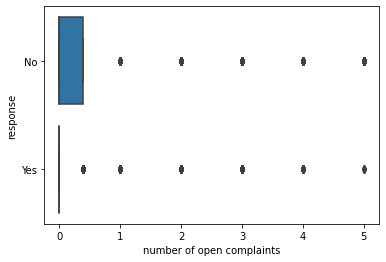

In [182]:
sns.boxplot(x = 'number of open complaints',y='response', data=df)
plt.show()
# Customers with open complaints seem to answer always "No"

In [183]:
# End of round 3

# ROUND 4

In [184]:
# Check the data types of the columns. 
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

df.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [185]:
import numpy as np
df_numerical = df.select_dtypes([np.number]) 
df_numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month_effective
0,4809.216960,48029,61,7.0,52,0.00,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.00,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.00,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.00,2,484.013411,1
4,9025.067525,23675,117,14.0,31,0.38,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.38,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.00,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.00,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.00,6,618.288849,2


In [119]:
df_categorical = df.select_dtypes([np.object]) 
df_categorical

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_3846/2223447497.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical = df.select_dtypes([np.object])


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [120]:
df.shape

(10910, 25)

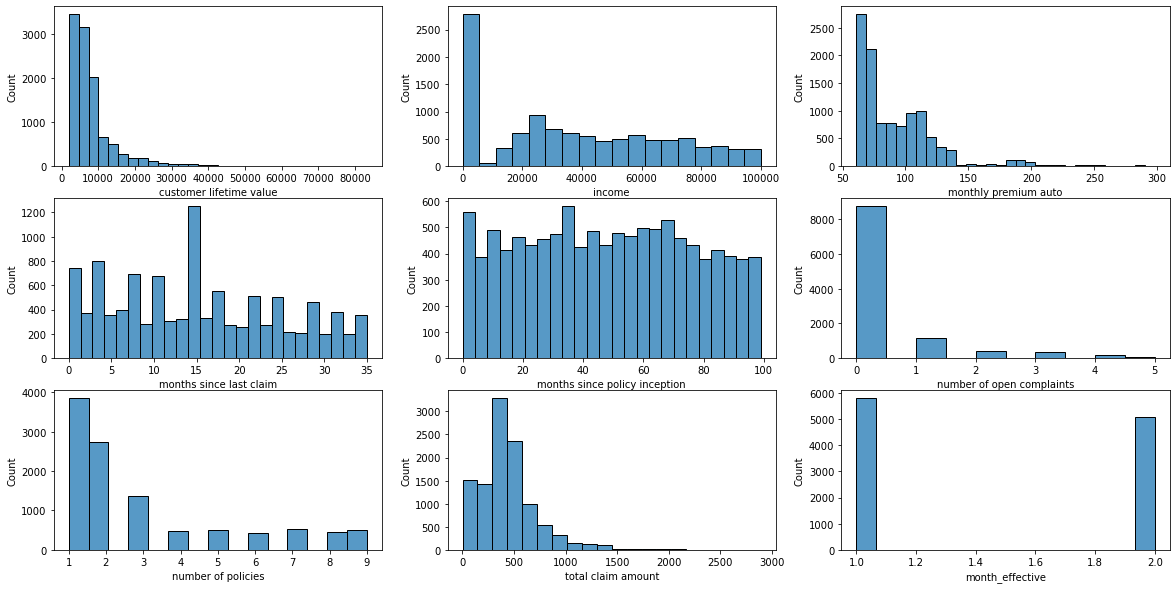

In [186]:
# Use seaborn library to construct distribution plots for the numerical variables
fig, ax = plt.subplots(3,3,figsize=(20,10))  
sns.histplot(x='customer lifetime value', data=df, bins = 30, ax=ax[0,0])   
sns.histplot(x='income', data=df, ax=ax[0,1])            
sns.histplot(x='monthly premium auto', data = df, bins=30, ax = ax[0,2]) 
sns.histplot(x='months since last claim', data = df, ax = ax[1,0]) 
sns.histplot(x='months since policy inception', data=df, ax=ax[1,1])   
sns.histplot(x='number of open complaints', data=df, bins = 10, ax=ax[1,2])            
sns.histplot(x='number of policies', data = df, bins = 15, ax = ax[2,0]) 
sns.histplot(x='total claim amount', data = df, bins = 20, ax = ax[2,1]) 
sns.histplot(x='month_effective', data = df, ax = ax[2,2]) 
plt.show()

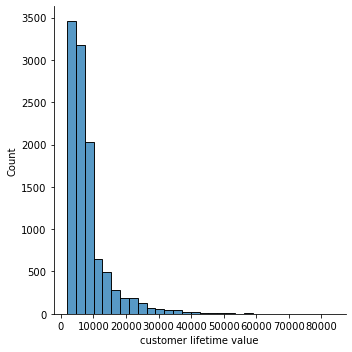

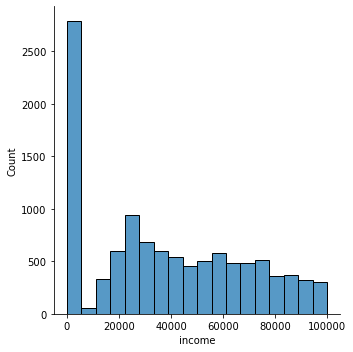

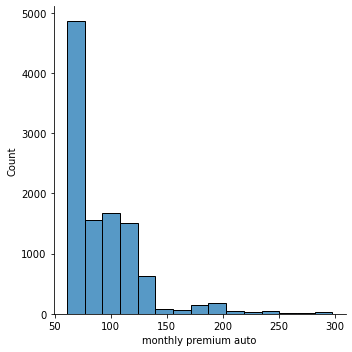

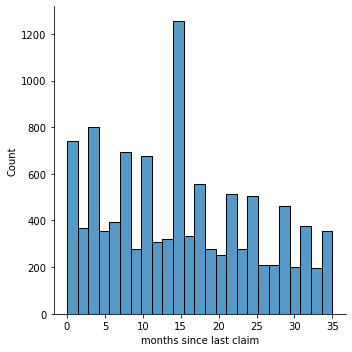

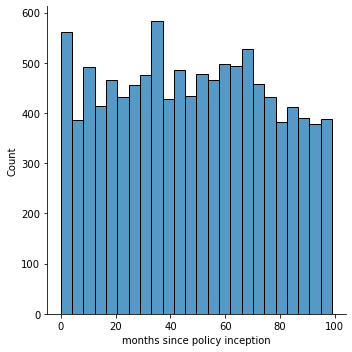

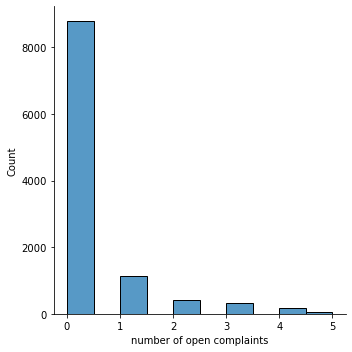

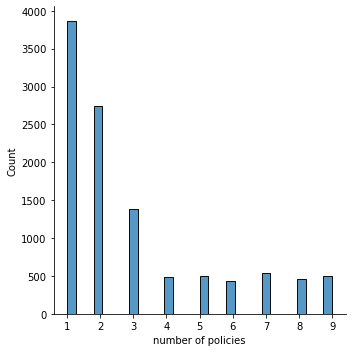

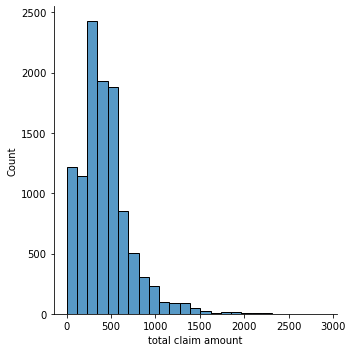

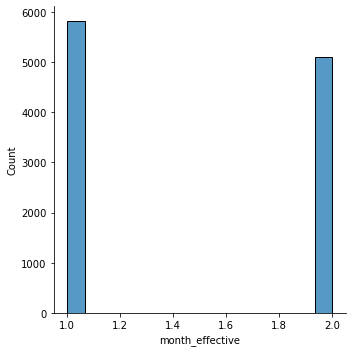

In [187]:
# another way to do it
sns.displot(x='customer lifetime value', data=df, bins = 30)   
sns.displot(x='income', data=df)            
sns.displot(x='monthly premium auto', data = df, bins= 15) 
sns.displot(x='months since last claim', data = df) 
sns.displot(x='months since policy inception', data=df)   
sns.displot(x='number of open complaints', bins = 10, data=df)            
sns.displot(x='number of policies', data = df) 
sns.displot(x='total claim amount', bins = 25, data = df) 
sns.displot(x='month_effective', data = df) 
plt.show()

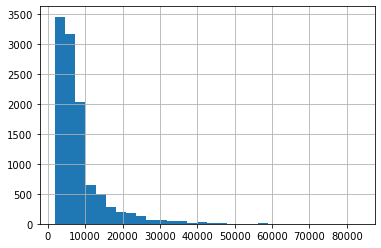

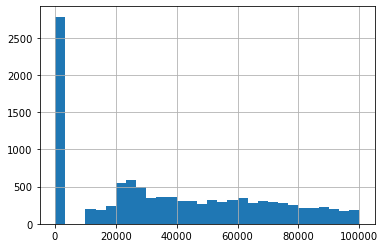

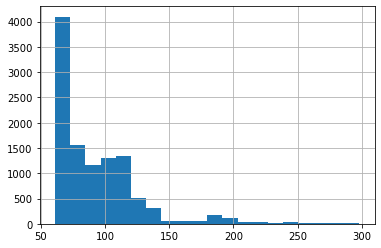

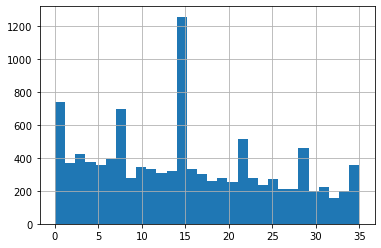

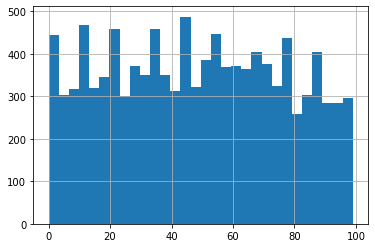

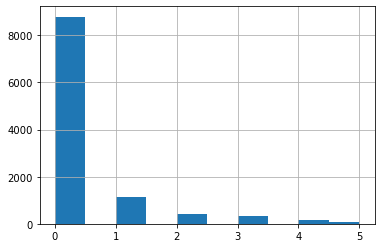

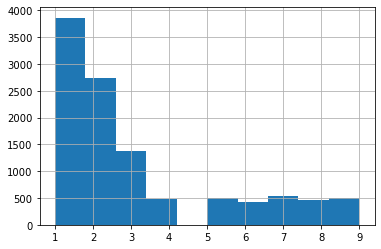

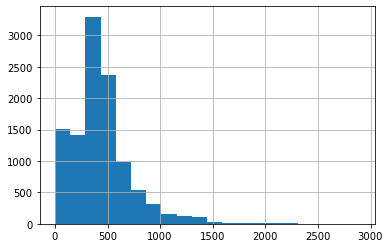

In [188]:
# Use Matplotlib to construct histograms
import matplotlib.pyplot as plt
%matplotlib inline

df['customer lifetime value'].hist(bins=30)
plt.show()
df['income'].hist(bins=30)
plt.show()
df['monthly premium auto'].hist(bins=20)
plt.show()
df['months since last claim'].hist(bins=30)
plt.show()
df['months since policy inception'].hist(bins=30)
plt.show()
df['number of open complaints'].hist(bins=10)
plt.show()
df['number of policies'].hist(bins=10)
plt.show()
df['total claim amount'].hist(bins=20)
plt.show()

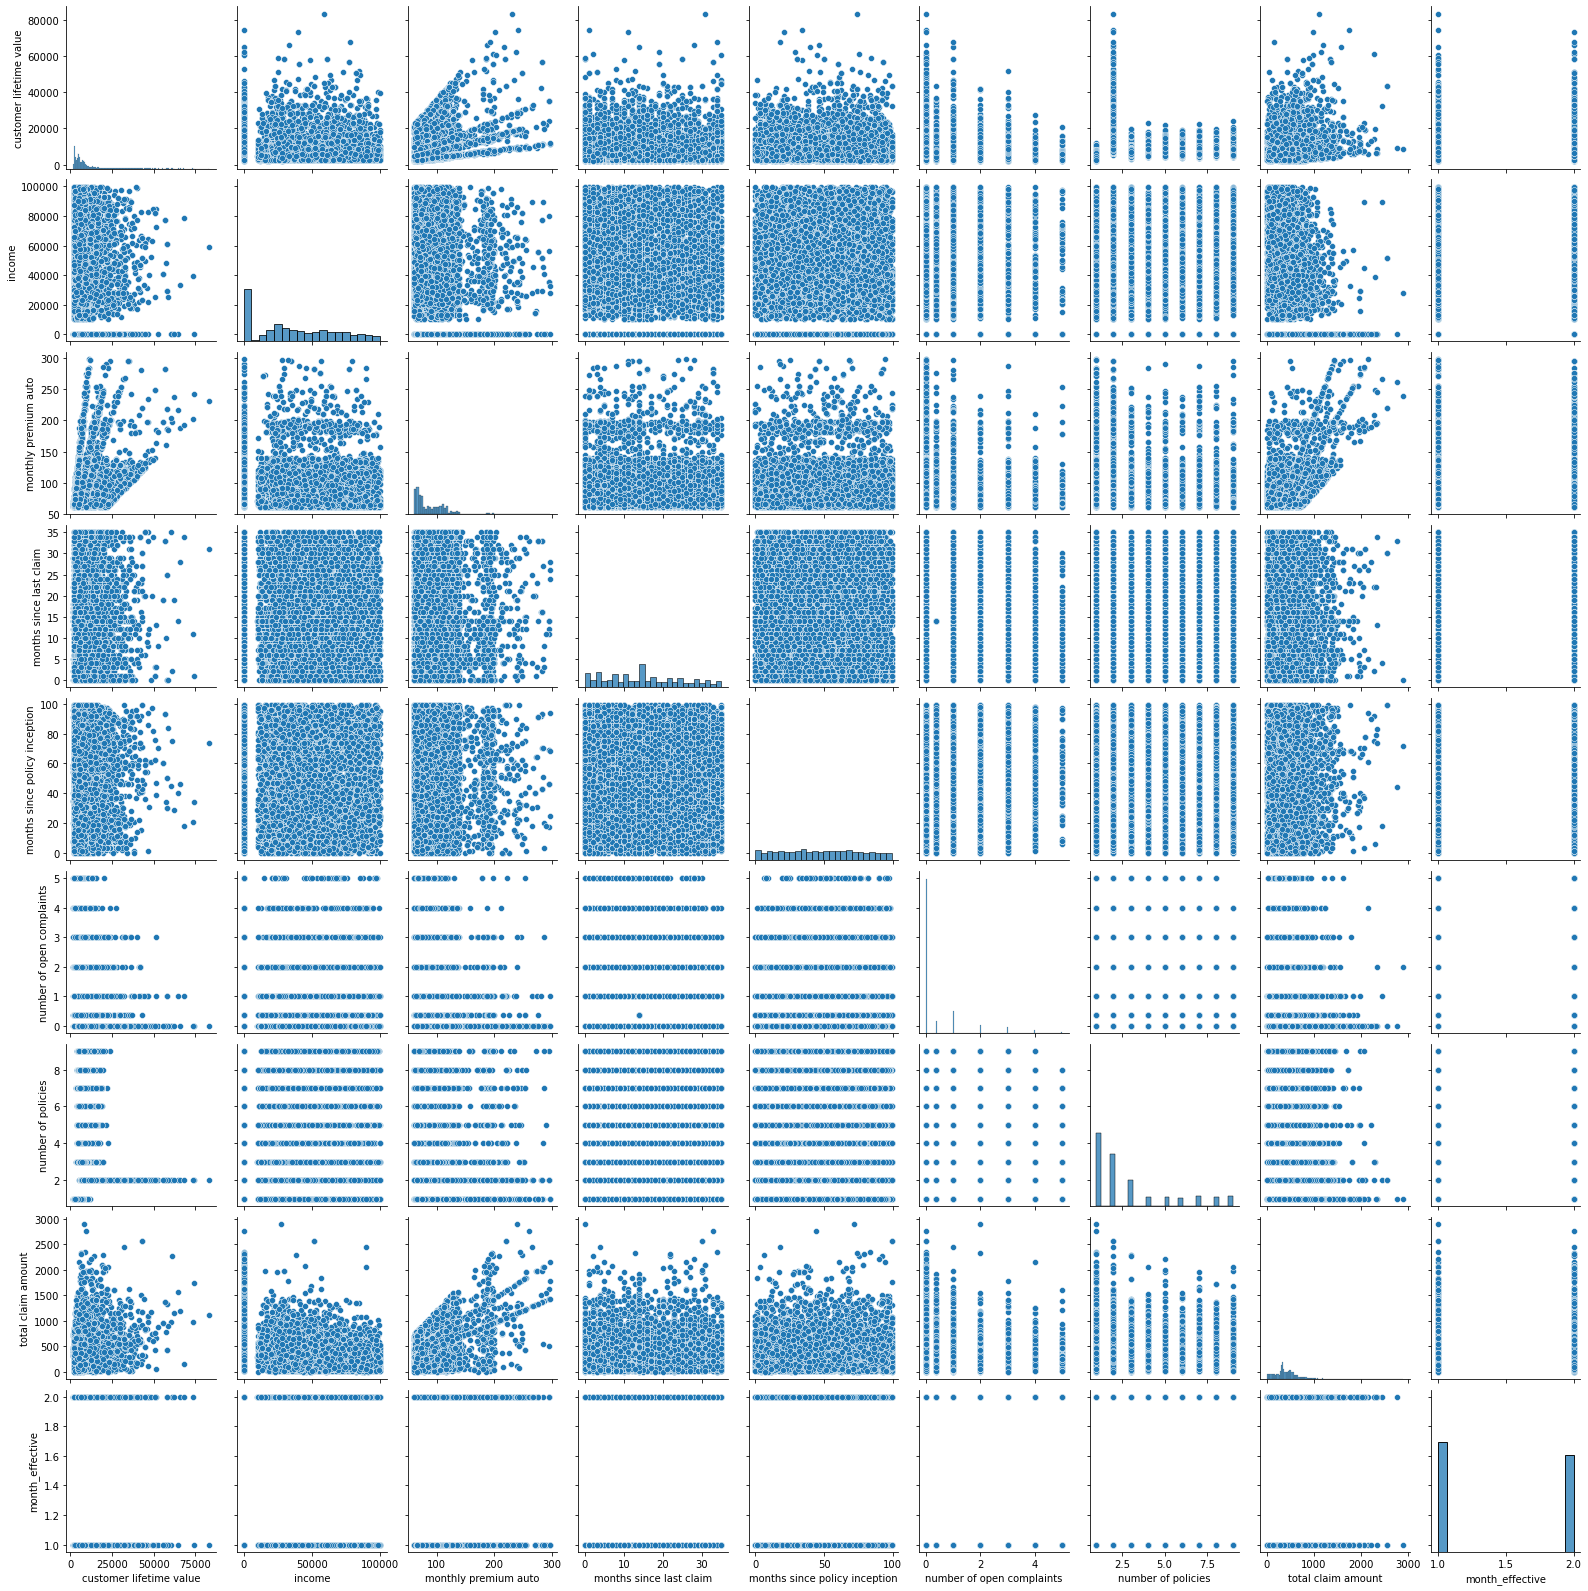

In [57]:
# Do the distributions for different numerical variables look like a normal distribution (didn't well understand the question)

sns.pairplot(df_numerical)
plt.show()

In [189]:
# For the numerical variables, check the multicollinearity between the features
correlations_num = df_numerical.corr()
correlations_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month_effective
customer lifetime value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.031493,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.006973,-0.009960,-0.354141,-0.000443
monthly premium auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010066,-0.020505,0.631799,0.007253
months since last claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.002276,0.006807,0.012340,-0.019666
months since policy inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004246,-0.009123,0.003095,0.015163
number of open complaints,-0.031493,0.006973,-0.010066,0.002276,0.004246,1.000000,0.003938,-0.011041,-0.004684
number of policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.003938,1.000000,-0.008923,0.005127
total claim amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.011041,-0.008923,1.000000,0.001425
month_effective,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.004684,0.005127,0.001425,1.000000


In [190]:
# It looks like we don't have multicollinearity with total claim amount here. 
# There is a light correlation between total claim amount and monthly premium auto + between customer lifetime value and total claim amount


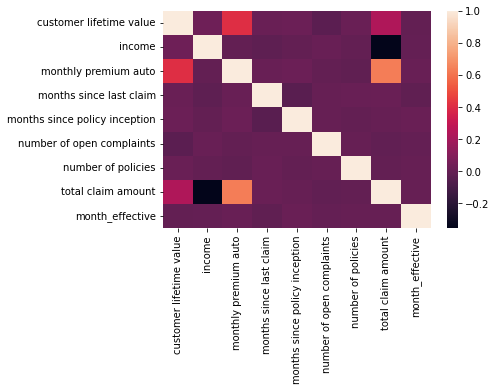

In [191]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap

# There is no high correlation between them, knowing that our target is total claim amount
# Let's do the heatmap to confirm

sns.heatmap(correlations_num)
plt.show()

In [130]:
# Total claim amount is correlated with monthly premium auto and lightly with customer lifetime value. 
# And customer lifetime value is lightly correlated with monthly premium auto

# ROUND 5

In [214]:
# x-y split

from sklearn.model_selection import train_test_split

X = df.drop(['total claim amount'], axis=1)
# df[['monthly premium auto']]
y = df['total claim amount']

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 24)
(2182, 24)
(8728,)
(2182,)


In [197]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()

lm.fit(X_num,y)

print(lm.intercept_)   
print(lm.coef_[0])

72.61552085355669
-0.0005490692868238288


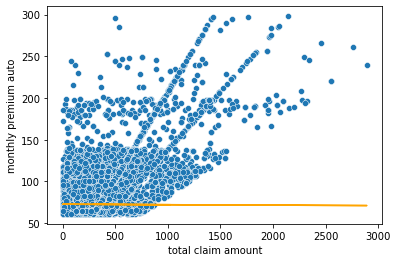

In [199]:
regression_line = lm.intercept_ + lm.coef_[0]*df['total claim amount']
plt.plot(df['total claim amount'], regression_line, c = 'orange')
sns.scatterplot(x='total claim amount',y='monthly premium auto',data=df)
plt.show()

In [201]:
print(lm.score(X_num,y))
y_pred=lm.predict(X_num)
print(mean_squared_error(y_pred,y))

0.5205302303128273
40928.331816786544


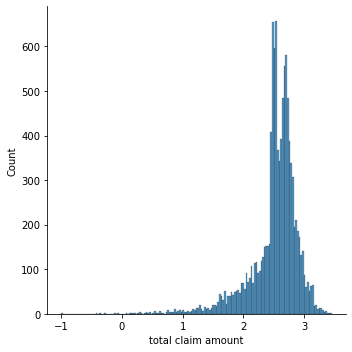

In [213]:
# I'll use logarithm transformation because I have a high positive skeweness for 'total claim amount'

def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

total_claim_log = df['total claim amount'].apply(lambda x :log_transfom_clean(x))
sns.displot(total_claim_log)
plt.show()

In [205]:
# I'll take off the outliers to get a more standard distribution

iqr = np.percentile(df['total claim amount'],80) - np.percentile(df['total claim amount'],20)
upper_limit = np.percentile(df['total claim amount'],80) + 1.5*iqr
lower_limit = np.percentile(df['total claim amount'],20) - 1.5*iqr

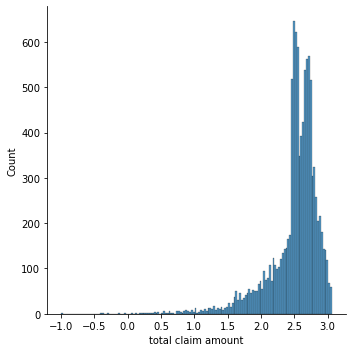

In [212]:
df_no_outliers = df[(df['total claim amount']>lower_limit) & (df['total claim amount']<upper_limit)]
total_claim_log = df_no_outliers['total claim amount'].apply(lambda x :log_transfom_clean(x))
sns.displot(total_claim_log)
plt.show()

In [ ]:
lm.fit(X_train,y_train)